### READ ME

Use the code blocks below to answer each question. Only print the output required for each question. Do not edit the comments at the top of each code cell. Otherwise, the auto-grader may misinterpret your results. See Question 0 as an an example of how to complete a task (leave it in your notebook; don't delete it):

In [72]:
# from google.colab import drive
# drive.mount('/content/drive')

In [73]:
# Question 0: Create a DataFrame with three rows and four columns. Name the 
# columns 'Col1', 'Col2', 'Col3', 'Col4'. Create an index for the DataFrame
# and give the rows the index values of 'Row1', 'Row2', 'Row3'. Place a value
# in each column equal to the {ColumnName/RowName}. e.g. Col1/Row1. Print
# the entire DataFrame.

import pandas as pd

df = pd.DataFrame(columns=['Col1', 'Col2', 'Col3', 'Col4'], index=['Row1', 'Row2', 'Row3'])

for col in df:
  for i, value in df[col].items():
    df.at[i, col] = f'{i}/{col}'

df

,Col1,Col2,Col3,Col4
Row1,Row1/Col1,Row1/Col2,Row1/Col3,Row1/Col4
Row2,Row2/Col1,Row2/Col2,Row2/Col3,Row2/Col4
Row3,Row3/Col1,Row3/Col2,Row3/Col3,Row3/Col4


## **Data Import**

In [74]:
# Question 1: Import the data file posted along with this assignment called
# 'student_enrollment_sample.csv'. This file contains real data from a large 
# online university in the United States. The identifying information has been
# deleted or randomized to maintain anonymity according to FERPA requirements. 
# This university wants to help their students succeed. However, many of them
# drop out for a variety of reasons. Some feel hopeless, helpless, or lost. The
# university wants to identify those students who are currently active, but
# likely to drop in the near future so that they can intervene and get the them 
# additional help. Your task is to create a predictive model to classify those 
# students who are predicted to drop, but currently active to give to the
# advisement center for targeted interventions. Complete the steps as outlined
# in the questions to complete this task.

# First, print out the first five records of the dataset. How many students are 
# in this sample?

import pandas as pd
df = pd.read_csv('student_enrollment_sample.csv')
print(len(df))
df

50001


,EXPECTED_START_DATE,GRADUATION_DATE,ENROLL_COUNT,NUMBER_AVERAGE,MINUTES_ATTENDED,HOURS_ATTEMPTED,HOURS_EARNED,AR_BALANCE_AMOUNT,MINUTES_ABSENT,DAYS_ABSENT,...,CREDITS_LEFT,ENROLLMENT_COUNT,MODS_ATTENDED_COUNT,HS_GRADUATED_FLAG,DISABLED_FLAG,HISPANIC_FLAG,VETERAN_FLAG,STATUS_DESCRIPTION,IN_SCHOOL_FLAG,SIMPLE_STATUS_DESCRIPTION
0,NaN,NaN,1.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Application Cancelled,0.0,Other
1,NaN,2/8/2016,1.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Applicant,0.0,Other
2,NaN,NaN,1.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,...,180.0,2.0,0.0,0.0,0.0,0.0,0.0,Pending Applicant - Portal Only,0.0,Other
3,NaN,NaN,1.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,...,60.0,3.0,0.0,0.0,0.0,1.0,0.0,Applicant,0.0,Other
4,NaN,NaN,1.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pending Applicant - Portal Only,0.0,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,6/22/2020,5/7/2023,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,180.0,1.0,0.0,0.0,0.0,0.0,0.0,No Show,0.0,Terminated
49997,6/22/2020,12/19/2021,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,95.0,2.0,0.0,0.0,0.0,0.0,0.0,No Show,0.0,Terminated
49998,6/22/2020,12/19/2021,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,70.0,2.0,13.0,0.0,0.0,1.0,0.0,No Show,0.0,Terminated
49999,6/22/2020,7/1/2020,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,95.0,1.0,0.0,0.0,0.0,0.0,0.0,False Start,0.0,Terminated


# **Two-Class Modeling**

## **Data Cleaning**

### Missing Values

In [75]:
# Question 2: Print out a list of missing values for each column in the 
# dataset. HINT: search for 'pandas .isna() example'

df.isna().sum().sort_values(ascending=False)

CUMMULATIVE_GPA_CREDITS      37157
CUMMULATIVE_GPA_POINTS       37157
MINUTES_ABSENT               16297
MINUTES_MAKEUP               16297
MINUTES_ATTENDED             16287
CUMMULATIVE_GPA              15550
LAST_ACTIVITY_DATE            4388
EXPECTED_START_DATE           1871
GRADUATION_DATE               1598
COHORT_YEAR                   1375
BIRTH_DATE                    1361
CREDITS_LEFT                  1336
CREDITS_REQUIRED              1336
MOD_NUMBER                    1324
DISABLED_FLAG                 1323
CREDITS_EARNED                1323
CREDITS_ATTEMPTED             1323
HS_GRADUATED_FLAG             1323
AR_BALANCE                    1323
ENROLLMENT_COUNT              1323
HISPANIC_FLAG                 1323
MODS_ATTENDED_COUNT           1323
VETERAN_FLAG                  1323
ENROLLMENT_GPA                1322
PROGRAM_GROUP                   14
STATUS_DESCRIPTION               1
IN_SCHOOL_FLAG                   1
AR_BALANCE_AMOUNT                1
DAYS_ABSENT         

In [76]:
# Question 3: Make a copy of the original DataFrame to work with
# (in case we want to use the original again later). Iterate through
# the new DataFrame and remove any column that has more than 30% of
# the records/cases missing. Print out a summary of missing value
# percentages for each remaining column.

df_noMissing = df.copy()

for col in df_noMissing:
  if df_noMissing[col].isna().sum() / len(df_noMissing) > 0.3:
    df_noMissing.drop(col, axis=1, inplace=True)

df_noMissing.isna().sum() / len(df_noMissing)


EXPECTED_START_DATE          0.037419
GRADUATION_DATE              0.031959
ENROLL_COUNT                 0.000020
NUMBER_AVERAGE               0.000020
HOURS_ATTEMPTED              0.000020
HOURS_EARNED                 0.000020
AR_BALANCE_AMOUNT            0.000020
DAYS_ABSENT                  0.000020
REENTRY_NUMBER               0.000020
PROGRAM_GROUP                0.000280
BIRTH_DATE                   0.027219
LAST_ACTIVITY_DATE           0.087758
MOD_NUMBER                   0.026479
COHORT_YEAR                  0.027499
AR_BALANCE                   0.026459
ENROLLMENT_GPA               0.026439
CREDITS_ATTEMPTED            0.026459
CREDITS_EARNED               0.026459
CREDITS_REQUIRED             0.026719
CREDITS_LEFT                 0.026719
ENROLLMENT_COUNT             0.026459
MODS_ATTENDED_COUNT          0.026459
HS_GRADUATED_FLAG            0.026459
DISABLED_FLAG                0.026459
HISPANIC_FLAG                0.026459
VETERAN_FLAG                 0.026459
STATUS_DESCR

In [77]:
# Question 4: Drop all remaining rows that contain any missing data.
# Print out the numer of rows and columns in the remaining dataset.

df_noMissing.dropna(inplace=True)
df_noMissing

,EXPECTED_START_DATE,GRADUATION_DATE,ENROLL_COUNT,NUMBER_AVERAGE,HOURS_ATTEMPTED,HOURS_EARNED,AR_BALANCE_AMOUNT,DAYS_ABSENT,REENTRY_NUMBER,PROGRAM_GROUP,...,CREDITS_LEFT,ENROLLMENT_COUNT,MODS_ATTENDED_COUNT,HS_GRADUATED_FLAG,DISABLED_FLAG,HISPANIC_FLAG,VETERAN_FLAG,STATUS_DESCRIPTION,IN_SCHOOL_FLAG,SIMPLE_STATUS_DESCRIPTION
1873,5/10/2021,4/21/2024,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,GAGAB,...,183.0,2.0,1.0,0.0,0.0,0.0,0.0,Future Start,0.0,Other
1874,5/10/2021,3/24/2024,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,BUBAB,...,180.0,1.0,0.0,0.0,0.0,0.0,0.0,Applicant,0.0,Other
1875,5/10/2021,3/24/2024,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,BUBAB,...,180.0,1.0,0.0,0.0,0.0,0.0,0.0,Applicant,0.0,Other
1876,5/10/2021,11/6/2022,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,MSMAA,...,95.0,1.0,1.0,0.0,0.0,0.0,0.0,Future Start,0.0,Other
1878,5/10/2021,11/6/2022,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,MSMAA,...,95.0,1.0,0.0,0.0,0.0,0.0,0.0,Applicant,0.0,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,6/22/2020,9/24/2023,1.0,73.571429,500.0,300.0,560.0,0.0,0.0,GAGAB,...,153.0,1.0,14.0,0.0,0.0,0.0,0.0,Probation,1.0,Active
49996,6/22/2020,5/7/2023,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,CSSMB,...,180.0,1.0,0.0,0.0,0.0,0.0,0.0,No Show,0.0,Terminated
49997,6/22/2020,12/19/2021,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,MSMAA,...,95.0,2.0,0.0,0.0,0.0,0.0,0.0,No Show,0.0,Terminated
49998,6/22/2020,12/19/2021,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,MSMAA,...,70.0,2.0,13.0,0.0,0.0,1.0,0.0,No Show,0.0,Terminated


### Handle Dates

In [78]:
# Question 5: Now it's time to handle the date values. LAST_ACTIVITY_DATE,
# EXPECTED_START_DATE, BIRTH_DATE, and GRADUATION_DATE may all be useful. 
# For LAST_ACTIVITY_DATE, EXPECTED_START_DATE, and BIRTH_DATE, replace the 
# date value with the number of days between that date and 2022-1-1. In other
# words: 2022-1-1 minus the date value in the field. For GRADUATION_DATE, 
# replace the date value with the number of days until graduation assuming
# that today's date is 2020-1-1. In other words, calculate: GRADUATION_DATE 
# minus 2020-1-1. Print out the first five rows to examine the results.

from datetime import datetime as dt
df_dates = df_noMissing.copy()
df_dates['BIRTH_DATE'] = pd.to_datetime(df_dates['BIRTH_DATE']).dt.date
df_dates['LAST_ACTIVITY_DATE'] = pd.to_datetime(df_dates['LAST_ACTIVITY_DATE']).dt.date
df_dates['EXPECTED_START_DATE'] = pd.to_datetime(df_dates['EXPECTED_START_DATE']).dt.date
df_dates['GRADUATION_DATE'] = pd.to_datetime(df_dates['GRADUATION_DATE']).dt.date

df_dates['LAST_ACTIVITY_DATE'] = (dt.strptime("2022-1-1", '%Y-%m-%d').date() - df_dates['LAST_ACTIVITY_DATE']).dt.days
df_dates['EXPECTED_START_DATE'] = (dt.strptime("2022-1-1", '%Y-%m-%d').date() - df_dates['EXPECTED_START_DATE']).dt.days
df_dates['BIRTH_DATE'] = (dt.strptime("2022-1-1", '%Y-%m-%d').date() - df_dates['BIRTH_DATE']).dt.days
df_dates['GRADUATION_DATE'] = (df_dates['GRADUATION_DATE'] - dt.strptime("2022-1-1", '%Y-%m-%d').date()).dt.days
df_dates

,EXPECTED_START_DATE,GRADUATION_DATE,ENROLL_COUNT,NUMBER_AVERAGE,HOURS_ATTEMPTED,HOURS_EARNED,AR_BALANCE_AMOUNT,DAYS_ABSENT,REENTRY_NUMBER,PROGRAM_GROUP,...,CREDITS_LEFT,ENROLLMENT_COUNT,MODS_ATTENDED_COUNT,HS_GRADUATED_FLAG,DISABLED_FLAG,HISPANIC_FLAG,VETERAN_FLAG,STATUS_DESCRIPTION,IN_SCHOOL_FLAG,SIMPLE_STATUS_DESCRIPTION
1873,236,841,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,GAGAB,...,183.0,2.0,1.0,0.0,0.0,0.0,0.0,Future Start,0.0,Other
1874,236,813,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,BUBAB,...,180.0,1.0,0.0,0.0,0.0,0.0,0.0,Applicant,0.0,Other
1875,236,813,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,BUBAB,...,180.0,1.0,0.0,0.0,0.0,0.0,0.0,Applicant,0.0,Other
1876,236,309,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,MSMAA,...,95.0,1.0,1.0,0.0,0.0,0.0,0.0,Future Start,0.0,Other
1878,236,309,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,MSMAA,...,95.0,1.0,0.0,0.0,0.0,0.0,0.0,Applicant,0.0,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,558,631,1.0,73.571429,500.0,300.0,560.0,0.0,0.0,GAGAB,...,153.0,1.0,14.0,0.0,0.0,0.0,0.0,Probation,1.0,Active
49996,558,491,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,CSSMB,...,180.0,1.0,0.0,0.0,0.0,0.0,0.0,No Show,0.0,Terminated
49997,558,-13,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,MSMAA,...,95.0,2.0,0.0,0.0,0.0,0.0,0.0,No Show,0.0,Terminated
49998,558,-13,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,MSMAA,...,70.0,2.0,13.0,0.0,0.0,1.0,0.0,No Show,0.0,Terminated


### Bin Categorical Values

In [79]:
# Question 6: The PROGRAM_GROUP feature indicates which academic program
# the student is working on. Some of them are very small programs and 
# represent less than five percent of the data. We need to bin those programs
# into a new value called "Other". Start by printing a list of PROGRAM_GROUP
# values divided by the total number of records in order to see what percent
# of the cases they represent. Then, iterate through the rows and change every 
# program value to "Other" if it does not belong to a PROGRAM_GROUP that 
# represents at least five percent of the cases. Finally, print out the new 
# listof PROGRAM_GROUP values (including the new 'Other') to make sure your
# routine worked correctly. You do not need to print the values in 'percent'
# format. The original decimal values are fine.


for row in df_dates.itertuples():
    if row[10] not in ['GAGAB', 'MSMAA', 'HSHMB', 'CSSMB', 'CSCNB', 'BUBAB']:
        df_dates.at[row[0], 'PROGRAM_GROUP'] = 'Other'

print(df_dates.PROGRAM_GROUP.value_counts() / len(df_dates))

GAGAB    0.282220
MSMAA    0.238341
HSHMB    0.140576
CSSMB    0.102791
CSCNB    0.099944
BUBAB    0.097209
Other    0.038919
Name: PROGRAM_GROUP, dtype: float64


### Relabel Label

In [80]:
# Question 7: Print the first five records of a filtered version of 
# the DataFrame including only the 'IN_SCHOOL_FLAG' and 'STATUS_DESCRIPTION' 
# features. Notice that all those who have graduated have an 'IN_SCHOOL_FLAG'
# of zero which makes them the same as students who have dropped out or
# have been terminated. Because we want students to graduate, we need to 
# treat them the same as those who are active. Therefore, convert the 
# 'IN_SCHOOL_FLAG' value for all graduates to 1 (or 1.0). In addition, convert
# their 'SIMPLE_STATUS_DESCRIPTION' to 'Active'.

df_ready = df_dates.copy()

df_ready.loc[df_ready['STATUS_DESCRIPTION'] == 'Graduate', 'IN_SCHOOL_FLAG'] = 1
df_ready.loc[df_ready['STATUS_DESCRIPTION'] == 'Graduate', 'SIMPLE_STATUS_DESCRIPTION'] = 'Active'
df_ready

,EXPECTED_START_DATE,GRADUATION_DATE,ENROLL_COUNT,NUMBER_AVERAGE,HOURS_ATTEMPTED,HOURS_EARNED,AR_BALANCE_AMOUNT,DAYS_ABSENT,REENTRY_NUMBER,PROGRAM_GROUP,...,CREDITS_LEFT,ENROLLMENT_COUNT,MODS_ATTENDED_COUNT,HS_GRADUATED_FLAG,DISABLED_FLAG,HISPANIC_FLAG,VETERAN_FLAG,STATUS_DESCRIPTION,IN_SCHOOL_FLAG,SIMPLE_STATUS_DESCRIPTION
1873,236,841,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,GAGAB,...,183.0,2.0,1.0,0.0,0.0,0.0,0.0,Future Start,0.0,Other
1874,236,813,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,BUBAB,...,180.0,1.0,0.0,0.0,0.0,0.0,0.0,Applicant,0.0,Other
1875,236,813,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,BUBAB,...,180.0,1.0,0.0,0.0,0.0,0.0,0.0,Applicant,0.0,Other
1876,236,309,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,MSMAA,...,95.0,1.0,1.0,0.0,0.0,0.0,0.0,Future Start,0.0,Other
1878,236,309,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,MSMAA,...,95.0,1.0,0.0,0.0,0.0,0.0,0.0,Applicant,0.0,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,558,631,1.0,73.571429,500.0,300.0,560.0,0.0,0.0,GAGAB,...,153.0,1.0,14.0,0.0,0.0,0.0,0.0,Probation,1.0,Active
49996,558,491,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,CSSMB,...,180.0,1.0,0.0,0.0,0.0,0.0,0.0,No Show,0.0,Terminated
49997,558,-13,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,MSMAA,...,95.0,2.0,0.0,0.0,0.0,0.0,0.0,No Show,0.0,Terminated
49998,558,-13,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,MSMAA,...,70.0,2.0,13.0,0.0,0.0,1.0,0.0,No Show,0.0,Terminated


## **Classification Modeling**

### Dummy Coding

In [101]:
# Question 8: Import the packages necessary for a DecisionTreeClassifier and 
# a train_test_split. We will use these later. For now, create another copy of the 
# latest DataFrame to work from. Using the new copy, convert MOD_NUMBER and 
# COHORT_YEAR to 'object' data types. That is because those values are numbers
# but, theoretically, they represent categorical values. Drop STATUS_DESCRIPTION
# and SIMPLE_STATUS_DESCRIPTION from the new DataFrame since those are alternative
# labels and we are going to use IN_SCHOOL_FLAG as the two-class label for our first
# model. Create dummy codes for all remaining features in the new DataFrame. Print
# out the first five records of the new DataFrame. There should be no remaining 
# categorical values and many new dummy code features.

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

df_dummies = df_ready.copy()

df_dummies.MOD_NUMBER = df_dummies.MOD_NUMBER.astype('object')
df_dummies.COHORT_YEAR = df_dummies.COHORT_YEAR.astype('object')

df_dummies.drop(columns=['STATUS_DESCRIPTION', 'SIMPLE_STATUS_DESCRIPTION'], inplace=True)

for col in df_dummies:
    if not pd.api.types.is_numeric_dtype(df_dummies[col]):
        df_dummies = pd.get_dummies(df_dummies, columns=[col], drop_first=True)

print(df_dummies.shape)

df_dummies.head()



(44965, 45)


,EXPECTED_START_DATE,GRADUATION_DATE,ENROLL_COUNT,NUMBER_AVERAGE,HOURS_ATTEMPTED,HOURS_EARNED,AR_BALANCE_AMOUNT,DAYS_ABSENT,REENTRY_NUMBER,BIRTH_DATE,...,MOD_NUMBER_8.0,MOD_NUMBER_9.0,MOD_NUMBER_10.0,MOD_NUMBER_11.0,MOD_NUMBER_12.0,MOD_NUMBER_13.0,COHORT_YEAR_2023.0,COHORT_YEAR_2024.0,COHORT_YEAR_2025.0,COHORT_YEAR_2026.0
1873,236,841,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12991,...,0,0,0,0,0,0,0,0,0,1
1874,236,813,1.0,0.0,0.0,0.0,0.0,0.0,0.0,236,...,0,0,0,0,0,0,0,0,0,1
1875,236,813,1.0,0.0,0.0,0.0,0.0,0.0,0.0,15512,...,0,0,0,0,0,0,0,0,0,1
1876,236,309,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7221,...,0,0,0,0,0,0,0,1,0,0
1878,236,309,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7298,...,0,0,0,0,0,0,0,1,0,0


### Select Label and Features

In [105]:
# Question 9: Set the y and X variables to represent the label
# and feature set. Print out the first five records of the feature
# list to verify it looks correct.

y = df_dummies.IN_SCHOOL_FLAG
X = df_dummies.drop(columns=['IN_SCHOOL_FLAG'])
X

,EXPECTED_START_DATE,GRADUATION_DATE,ENROLL_COUNT,NUMBER_AVERAGE,HOURS_ATTEMPTED,HOURS_EARNED,AR_BALANCE_AMOUNT,DAYS_ABSENT,REENTRY_NUMBER,BIRTH_DATE,...,MOD_NUMBER_8.0,MOD_NUMBER_9.0,MOD_NUMBER_10.0,MOD_NUMBER_11.0,MOD_NUMBER_12.0,MOD_NUMBER_13.0,COHORT_YEAR_2023.0,COHORT_YEAR_2024.0,COHORT_YEAR_2025.0,COHORT_YEAR_2026.0
1873,236,841,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,12991,...,0,0,0,0,0,0,0,0,0,1
1874,236,813,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,236,...,0,0,0,0,0,0,0,0,0,1
1875,236,813,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,15512,...,0,0,0,0,0,0,0,0,0,1
1876,236,309,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,7221,...,0,0,0,0,0,0,0,1,0,0
1878,236,309,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,7298,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,558,631,1.0,73.571429,500.0,300.0,560.0,0.0,0.0,9188,...,0,0,0,0,0,0,0,0,1,0
49996,558,491,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,12223,...,0,0,0,0,0,0,0,0,1,0
49997,558,-13,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,9831,...,0,0,0,0,0,0,1,0,0,0
49998,558,-13,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,7451,...,1,0,0,0,0,0,1,0,0,0


### Split Data

In [106]:
# Question 10: Split the y and X sets into training and testing sets. Do 
# a 70/30 split meaning 70% training data. Use a random seed of 12345.
# Print out the first five records of the X_test dataset.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)
X_test.head()

,EXPECTED_START_DATE,GRADUATION_DATE,ENROLL_COUNT,NUMBER_AVERAGE,HOURS_ATTEMPTED,HOURS_EARNED,AR_BALANCE_AMOUNT,DAYS_ABSENT,REENTRY_NUMBER,BIRTH_DATE,...,MOD_NUMBER_8.0,MOD_NUMBER_9.0,MOD_NUMBER_10.0,MOD_NUMBER_11.0,MOD_NUMBER_12.0,MOD_NUMBER_13.0,COHORT_YEAR_2023.0,COHORT_YEAR_2024.0,COHORT_YEAR_2025.0,COHORT_YEAR_2026.0
2148,236,813,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,7079,...,0,0,0,0,0,0,0,0,0,1
22511,390,659,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,9812,...,0,0,0,0,0,1,0,0,0,1
45412,530,519,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,12352,...,1,0,0,0,0,0,0,0,1,0
16742,348,-125,1.0,99.468553,1790.0,1790.0,-75.0,0.0,0.0,9701,...,0,0,0,0,0,0,0,0,0,1
7689,292,253,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,13273,...,0,0,0,0,0,0,0,1,0,0


### Create Classifier and Fit Model

In [108]:
# Question 11: Create and fit a DecisionTreeClassifier() model using the 
# training datasets.

clf = DecisionTreeClassifier().fit(X_train, y_train)

### Compare Actual Versus Predicted Values

In [110]:
# Question 12: Generate predictions for the testing dataset. Add the 
# predicted values to a new DataFrame along with the actual values and
# print out the first 10 records. How many of the records are inaccurate?

y_pred = clf.predict(X_test)

pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).head(10)

,Actual,Predicted
2148,0.0,0.0
22511,0.0,0.0
45412,0.0,0.0
16742,1.0,1.0
7689,0.0,0.0
22725,0.0,0.0
26189,0.0,0.0
39307,0.0,0.0
48033,0.0,0.0
23015,0.0,0.0


### Assess Model Fit/Quality/Accuracy

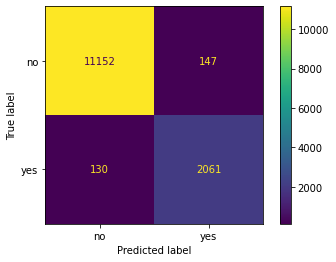

In [116]:
# Question 13: Generate a confusion matrix for the results. How many 
# students are active, but predicted to quit?

from sklearn import metrics

from matplotlib import pyplot as plt
cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels=['no', 'yes'])
cm_display.plot(values_format='d')
plt.show()


In [87]:
# Question 14: Generate the accuracy, precision, recall, and f1 scores for 
# the predictions of active students. What is the accuracy score?

### Visualize Classification Model

In [112]:
# Question 15: Generate a tree visualization using export_graphviz. 
# What feature is used in the most important feature?

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus, six

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names = X.columns,class_names=['no', 'yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('DecisionTreeCheckpoint.png')
Image(graph.create_png()) 

# **Multi-Class Modeling**

## **Data Cleaning**

### Combine or Eliminate Low Frequency Values

In [89]:
# Question 16: The label 'IN_SCHOOL_FLAG' was ideal for a two-class classification
# model. However, most students are put on probation before they are terminated. 
# Therefore, it could be useful to predict three distinct categories: Active, 
# Probation, and Terminated. First, let's identify what all possible label combinations
# exist across all three labels. Print a list of all value combinations of 
# 'STATUS_DESCRIPTION', 'IN_SCHOOL_FLAG', and 'SIMPLE_STATUS_DESCRIPTION' along 
# with a count of how often each occurs. 

# HINT: consider using the .groupby() method of Pandas to perform this in a single
# line of code. See the image below for an example of what this may look like.
# The purpose behind this task is to explore our options for potential labels in
# this dataset. Each of those features represent current states for each student.


In [90]:
# Question 17: To simplify our eventual model, eliminate all records for students
# whose 'SIMPLE_STATUS_DESCRIPTION' = 'Other'. Then, reprint the table above to 
# ensure it worked properly.

In [91]:
# Question 18: Next, eliminate anyone whose 'SIMPLE_STATUS_DESCRIPTION' = 
# 'Transfer To Other Program', 'No Show', or 'False Start' since those outcomes
# are not relevant to students who were once active. Re-print the same summary
# table afterward.


In [92]:
# Question 19: Finally, relabel the 'SIMPLE_STATUS_DESCRIPTION' of those whose
# 'STATUS_DESCRIPTION' = 'Probation' to 'Probation'. Re-print the table.


## **Classification Modeling**

### Dummy Codes

In [93]:
# Question 20: Create a new copy of the DataFrame to work from. The features
# 'MOD_NUMBER' and 'COHORT_YEAR' represent categorical values that do not have an 
# order. Therefore, they should be treated as categories and cast to objects. Once
# you have done so, drop the alternative labels 'STATUS_DESCRIPTION' and 
# 'IN_SCHOOL_FLAG' from the dataset because we will be predicting 
# 'SIMPLE_STATUS_DESCRIPTION'. Then, generate dummy codes for the remaining features.
# Print out the first five records to verify everything worked correctly.


### Select Label and Features

In [94]:
# Question 21: Create the y and X variables to store the label and features
# using 'SIMPLE_STATUS_DESCRIPTION' as the label. Print out the first five 
# records of X to make sure everything looks correct.


### Split Data

In [95]:
# Question 22: Split the data using 70/30 split and 12345 as the random seed


### Create Classifier and Fit Model

In [96]:
# Question 23: Train a decision tree classifier model using the datasets
# you just generated.


### Compare Actual Versus Predicted Values

In [97]:
# Question 24: Predict the y values for the testing dataset and add them to
# a DataFrame along with the actual y values for comparison. Print out the 
# first 20 records. 


### Assess Model Fit/Quality/Accuracy

In [98]:
# Question 25: Generate and print a confusion matrix to view the results. 


In [99]:
# Question 26: Generate the fit metrics (accuracy, precision, recall, f1)
# for the label value 'terminated'.


### Visualize Classification Model

In [100]:
# Question 27: Generate a decision tree visualization using export_graphviz
